# Side-Channel Analaysis Assignement 2
## Part 1: CPA hardware AES-128

The purpose of part 1 is to implement an attack against hardware-based cryptography (e.g. on an FPGA device). For this part, the encryption algorithm used is AES-128. 

The attack will be performed during the **last** round of encryption, as shown below. Attacking the last round of encryption has the advantage of removing MixColumns from the side-channel attack selection function. 

The sequence of operations for the last round is shown below. Note that the Hamming weight model is not usually applicable in hardware implementations. Thus, it must be replaced with the Hamming distance between the old and the new register state, i.e. the number of bit flips caused when the old register state gets updated with the new register state.

 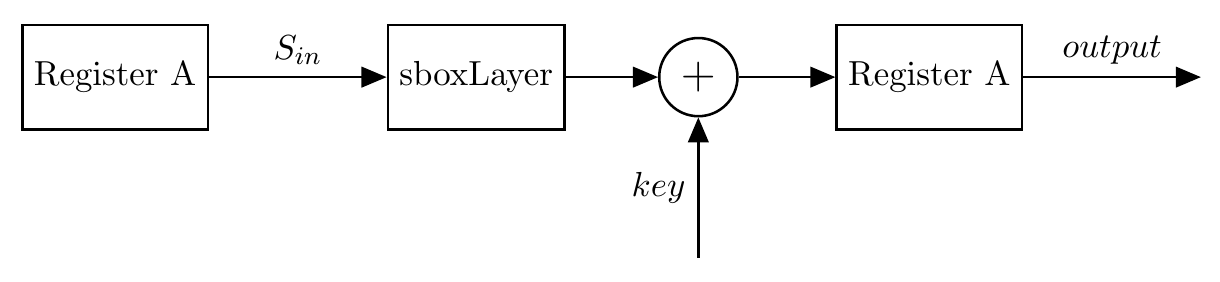

The variables in the image above contain 8-bit values (bytes). Using CPA you need to recover a correct byte from the last round key. Note that you need to invert the Sbox in order to create predictions about the value $S_{in}$.

The traceset (10k traces, 2k samples each) can be downloaded here:
- https://mega.nz/#!b9MXSbAS!Cnh4lm6S0xqXHgp2eQQX0qzXbcQZiljwuOxjixuENvI

The output byte can be downloaded here:
- https://mega.nz/#!30FwhLiC!Qf3-7jYlKnwrybTGBp2UzZLAhphXwoGAp3Hf9aiY9lM

Plot the correlation of all the key candidates over the samples and find the correct key byte. 

In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

sbox = np.array([
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
    ])

1. Load the `output_data.mat` and `hardware_traces.mat` matrices with the `scipy.io` `loadmat` function.

2. Construct a (10000,256) matrix with values of y_predict for all in values and possibles k (byte values)

3. Compute correlation betweeen power predictions and traces.

4. Rank keys.

5. Plot the correlation values for all key guesses.